In [72]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\Program Files\Tesseract-OCR\\tesseract.exe'

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

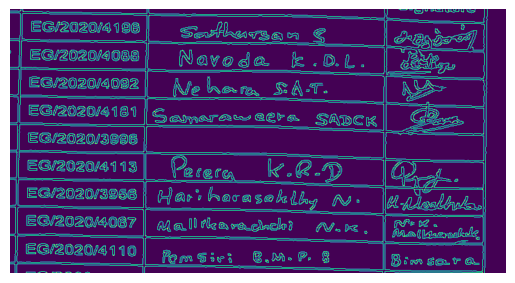

In [152]:
img = cv2.imread('images/rhalf1.png', 0) 
edges = cv2.Canny(img,100,200)
plt.axis('off')
plt.imshow(edges)

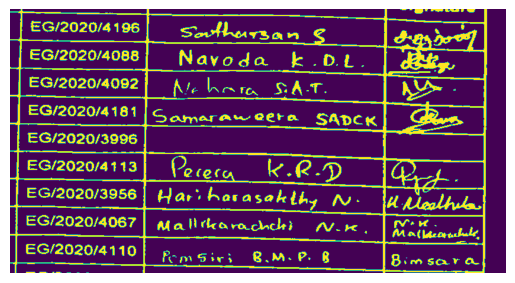

In [153]:
# read image, convert to grayscale, thresholding the image

img = cv2.imread('images/rhalf1.png', 0) 
(thresh, img_bin) = cv2.threshold(img, 128, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU) #perform both global and otsu thresholding

img_bin = 255-img_bin 
cv2.imwrite("Image_bin.jpg",img_bin)
plt.axis('off')
plt.imshow(img_bin)

In [156]:
# need morphological operations (based on shape=RECT) to detect boxes

kernel_length = np.array(img).shape[1]//80 # Defining a kernel length [originaly 80]
 
verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length)) #detect all the verticle lines - EROSION
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1)) #to detect all the horizontal lines - DILATION

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)) #cv2.getStructuringElement(shape,(num_of_columns,num_of_rows))

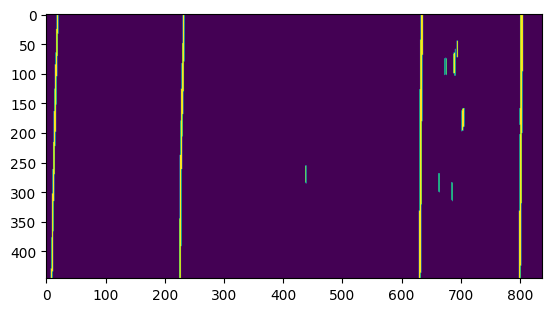

In [157]:
# Morphological operation to detect vertical lines from an image

img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
plt.imshow(verticle_lines_img)

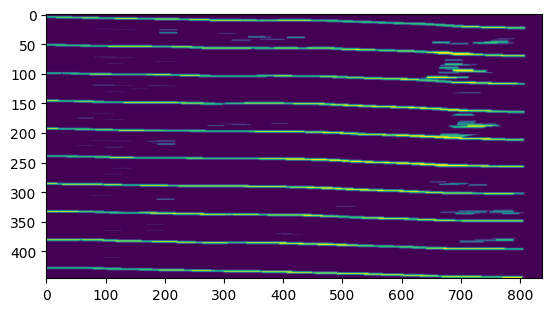

In [151]:
# Morphological operation to detect horizontal lines from an image
img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
plt.imshow(horizontal_lines_img)

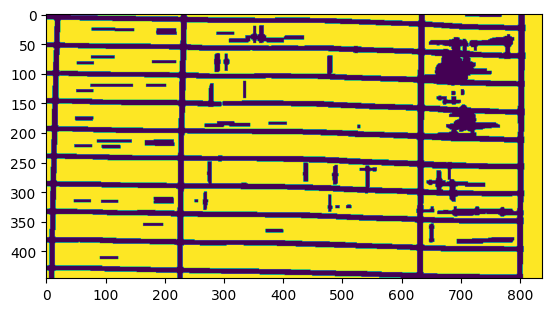

In [141]:
# add these two images = only boxes 
# no info = no noise

# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5
beta = 1.0 - alpha
# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(img_final_bin)

In [142]:
contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [143]:
# To sort all the contours by top to bottom function is defined.

def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
        key=lambda b:b[1][i], reverse=reverse))

    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

# Find contours for image, which will detect all the boxes
contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

(contours, boundingBoxes) = sort_contours(contours, method="right-to-left")

In [136]:
idx = 0

for c in contours:

    x, y, w, h = cv2.boundingRect(c)
    if (w > 80 and h > 20):
        idx += 1
        new_img = img[y:y+h, x:x+w]
        cv2.imwrite(str(idx) + '.png', new_img)

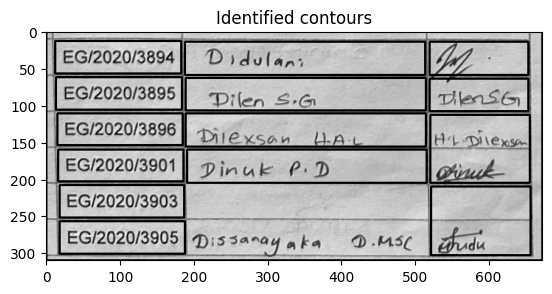

In [115]:
boxes = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if (w > 80 and h > 20 and h<30) and w > 3*h:
        image = cv2.rectangle(img_final_bin,(x,y),(x+w,y+h),(0,255,0),2)
        boxes.append([x,y,w,h])
plotting = plt.imshow(image,cmap='gray')
plt.title("Identified contours")
plt.show()

In [132]:
idx = 0
for c in contours:

    x, y, w, h = cv2.boundingRect(c)
    if (w > 80 and h > 20) and w > 3*h:
        idx += 1
        new_img = img[y:y+h, x:x+w]
        out = pytesseract.image_to_string(new_img)
        print(out)




Ae ae





Bimsara

Sotharsa “a ¢

Navoda F-.DL.

Neharn SAT. —

Sameraweera SaAncK


Malitkarachchi Ay re ,


Har? havasakih, Ts.

Perera ¢v.R-D

FomSivi B.M-P. 8B

EG/2020/4196

EG/2020/4088

EG/2020/4092

EG/2020/4181

EG/2020/3996

EG/2020/4113


EG/2020/3956


EG/2020/4110


EG/2020/4067



In [144]:
idx = 1
dataframe_final=[]

for c in contours:

    x, y, w, h = cv2.boundingRect(c)
    if (w > 80 and h > 20):
            mod = idx%3
            if mod== 1:
                new_img = img[y:y+h, x:x+w]
                out = pytesseract.image_to_string(new_img)
                dataframe_final.append(out)
                idx += 1

            elif mod==0:
                new_img = img[y:y+h, x:x+w]
                cv2.imwrite(str(idx) + '.png', new_img)
                idx += 1
                
            else:
                idx += 1

print(idx)
                # idx =+1
                    


27


In [128]:
arr = np.array(dataframe_final)
arr
# arr.tofile('data1.csv', sep = ',')
# my_arr = arr.reshape((9,))
# my_arr.tofile('data.csv', sep = ',')
# df = pd.DataFrame(my_arr, columns = ['Reg No','Name','Signature'])
# df.to_csv("test.csv")

array(['EG/2020/4196\n', 'EG/2020/4088\n', 'EG/2020/4092\n',
       'EG/2020/4181\n', 'EG/2020/3996\n', 'EG/2020/4113\n\n',
       'EG/2020/3956\n\n', 'EG/2020/4067\n', 'EG/2020/4110\n\n'],
      dtype='<U14')